In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r"C:\Users\ksoum\Downloads\skillcraf\Task 2\test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [50]:
df.describe().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,2.27,30.27,0.45,0.39,35.63
std,120.81,0.84,14.18,0.90,0.98,55.91
min,892.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,1.00,21.00,0.00,0.00,7.90
50%,1100.50,3.00,27.00,0.00,0.00,14.45
75%,1204.75,3.00,39.00,1.00,0.00,31.50
max,1309.00,3.00,76.00,8.00,9.00,512.33


In [52]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
# Age imputation using group-based median
df['Age_filled'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Fare imputation for missing values
df['Fare_filled'] = df['Fare'].fillna(
    df.groupby(['Pclass', 'Embarked'])['Fare'].transform('median')
)

# Cabin feature engineering
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df['Cabin_Deck'] = df['Cabin'].str[0].fillna('Unknown')

# Create Family_Size column (SibSp + Parch + 1 for self)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [56]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_filled', 'Fare_filled',
       'Has_Cabin', 'Cabin_Deck', 'Family_Size'],
      dtype='object')

In [58]:
# MUST CREATE correlation_matrix BEFORE using it!
numerical_vars = ['Age_filled', 'SibSp', 'Parch', 'Fare_filled', 'Family_Size', 'Has_Cabin']
correlation_matrix = df[numerical_vars].corr()
print("Correlation matrix ready!")


Correlation matrix ready!


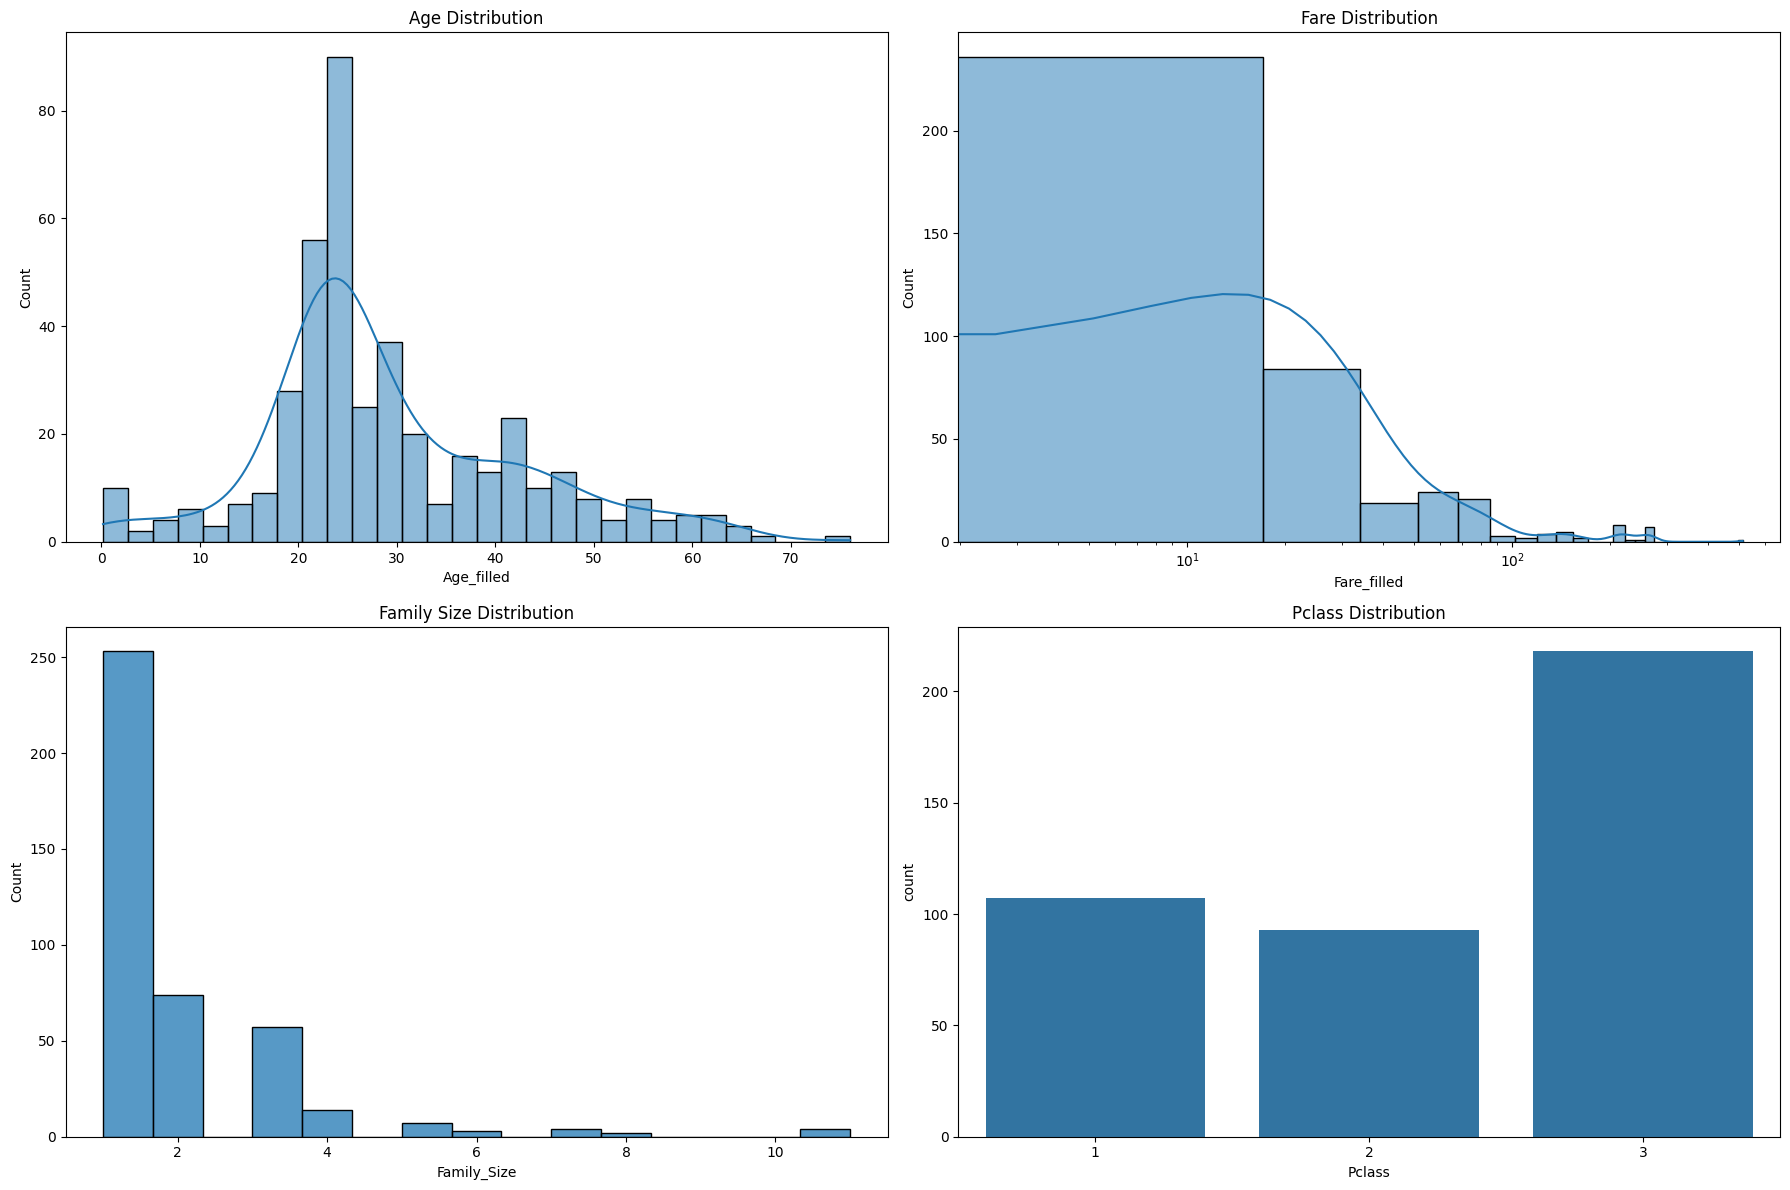

In [60]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Age distribution
sns.histplot(data=df, x='Age_filled', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# Fare distribution (log scale)
sns.histplot(data=df, x='Fare_filled', bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_xscale('log')
axes[0,1].set_title('Fare Distribution')

# Family size distribution
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
sns.histplot(data=df, x='Family_Size', bins=15, kde=False, ax=axes[1,0])
axes[1,0].set_title('Family Size Distribution')

# Pclass distribution
sns.countplot(data=df, x='Pclass', ax=axes[1,1])
axes[1,1].set_title('Pclass Distribution')

plt.tight_layout()
plt.show()


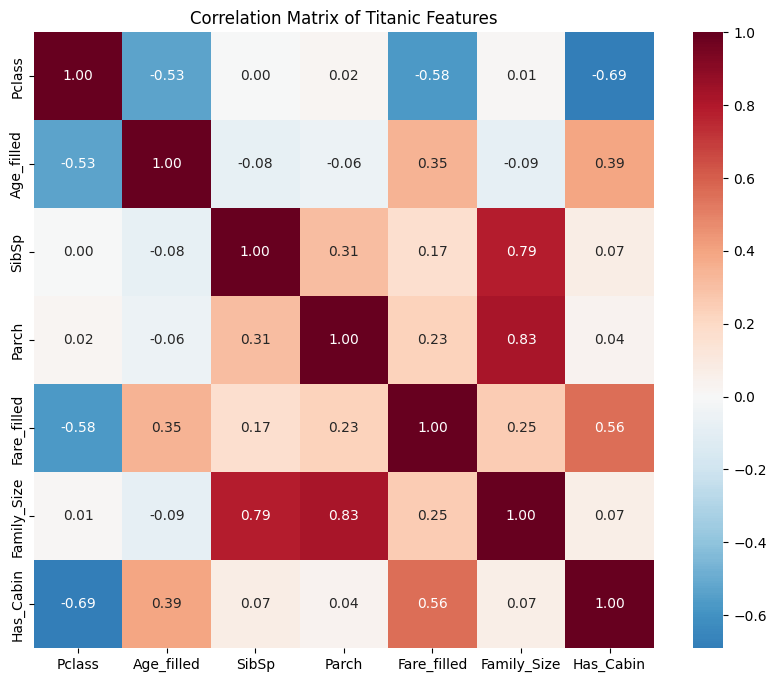

In [62]:
# Select numerical features for correlation
numerical_vars = ['Pclass', 'Age_filled', 'SibSp', 'Parch', 
                  'Fare_filled', 'Family_Size', 'Has_Cabin']

# Correlation matrix
correlation_matrix = df[numerical_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title("Correlation Matrix of Titanic Features")
plt.show()
